In [11]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate
import os
import pathlib
import pandas as pd
import numpy as np
from clldutils.path import Path

In [12]:
path="C:\\Users\\arina\\OneDrive\\Desktop\\python\\chest_xray\\chest_xray"

In [13]:
np.random.seed(40)
data = ImageDataBunch.from_folder(path, train = '.', valid_pct=0.2,
                                  ds_tfms=get_transforms(), size=224,
                                  num_workers=4).normalize(imagenet_stats)

C:\Users\arina\AppData\Local\Programs\Python\Python37\lib\site-packages\fastai\vision\transform.py:247: UserWarning: torch.solve is deprecated in favor of torch.linalg.solveand will be removed in a future PyTorch release.
torch.linalg.solve has its arguments reversed and does not return the LU factorization.
To get the LU factorization see torch.lu, which can be used with torch.lu_solve or torch.lu_unpack.
X = torch.solve(B, A).solution
should be replaced with
X = torch.linalg.solve(A, B) (Triggered internally at  C:\actions-runner\_work\pytorch\pytorch\builder\windows\pytorch\aten\src\ATen\native\BatchLinearAlgebra.cpp:859.)
  return _solve_func(B,A)[0][:,0]


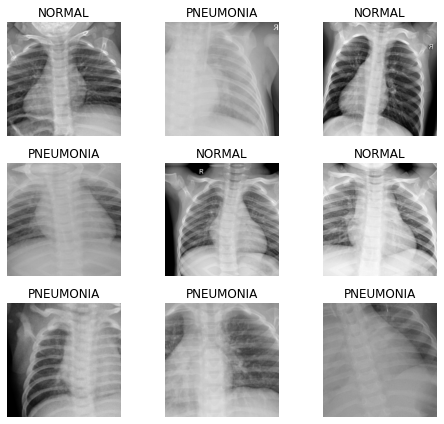

In [14]:
data.show_batch(rows=3, figsize=(7,6),recompute_scale_factor=True)

In [15]:
learn = cnn_learner(data, models.resnet50, metrics=[accuracy], model_dir = Path('Path'),path = Path("."))

Downloading: "https://download.pytorch.org/models/resnet50-0676ba61.pth" to C:\Users\arina/.cache\torch\hub\checkpoints\resnet50-0676ba61.pth
100%|██████████| 97.8M/97.8M [00:10<00:00, 9.74MB/s]


LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


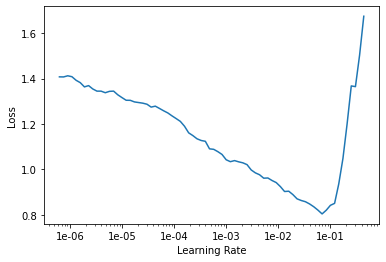

In [16]:
learn.lr_find()
learn.recorder.plot(suggestions=True)

In [17]:
lr1 = 1e-3
lr2 = 1e-1
learn.fit_one_cycle(4,slice(lr1,lr2))

# lr1 = 1e-3
lr = 1e-1
learn.fit_one_cycle(20,slice(lr))

learn.unfreeze()
learn.lr_find()
learn.recorder.plot()
learn.fit_one_cycle(10,slice(1e-4,1e-3))

learn.recorder.plot_losses()

epoch,train_loss,valid_loss,accuracy,time
0,0.423921,1.384696,0.872758,36:38
1,0.383345,0.454164,0.892400,40:55
2,0.198684,0.088772,0.970111,30:37
3,0.121153,0.097603,0.964987,27:09


epoch,train_loss,valid_loss,accuracy,time


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
img = open_image('IM-0001-0001.jpeg')
print(learn.predict(img)[0])